In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kalman( x, P, m, R, motion, Q, F, H ):
        '''
        Parameters:
        x: initial state
        P: initial uncertainty convariance matrix
        measurement: observed position ( same shape as H * x )
        R: measurement noise ( same shape as H )
        motion: external motion added to state vector x
        Q: motion noise ( same shape as P )
        F: next state function: x_prime = F * x
        H: measurement function: position = H * x

        Return: the updated and predicted new values for ( x, P )

        See also http://en.wikipedia.org/wiki/Kalman_filter

        This version of kalman can be applied to many different situations by
        appropriately defining F and H 
        '''

#---- UPDATE x, P based on measurement m    
#            distance between measured and current position-belief

        y = m - H * x

        S = H * P * H.T + R  # residual convariance
        K = P * H.T * S.I    # Kalman gain

        x = x + K * y
        I = np.matrix( np.eye( F.shape[0] ) ) # identity matrix
        P = ( I - K * H ) * P

#---- PREDICT x, P based on motion

        x = F * x + motion
        P = F * P * F.T + Q

#---- Exit

        return x, P

In [3]:


#pb1

#read

data1=np.loadtxt('pb1.csv',delimiter=',')

In [4]:
print(data1)

[  10.15823595   21.3944091    28.52098126   41.76879326   50.4502349
   58.51408228   74.31567757   79.83227574   91.03243157  100.66481553
  112.14003094  121.17343443  130.08090596  140.52407661  152.08278008
  163.68833591  170.14701714  179.45836976  192.09244152  197.85803669
  211.062554    221.1426369   230.65969527  239.45040913  254.22574889
  258.16299121  268.49061549  276.41661479  289.1715701   301.43277336
  311.01721912  319.20919428  328.84929635  345.23797227  348.07538627
  360.14161867  370.14973193  378.72565739  388.26656207  400.81184481
  412.96375726  419.81631675  431.48583492  438.64697342  451.12280409
  460.13544249  471.59140392  480.63963117  491.40166559  500.01857401
  509.83862538  516.24011778  531.42916363  542.75992547  550.22769886
  560.72827628  569.16088849  576.5275065   589.81185271  597.24921866
  605.94721634  621.61712689  630.12217768  641.51387459  649.95522802
  660.17993264  668.66022059  681.77700836  691.25147789  700.5935751
  708.58

In [29]:
sz=len(data1)
N = sz
x = np.matrix( '0. 0. 0. 0.' ).T 
P = np.matrix( np.eye( 4 ) ) *1000# initial uncertainty
R = 0.1
F = np.matrix( '''
            1. 0. 1. 0.;
            0. 1. 0. 1.;
            0. 0. 1. 0.;
            0. 0. 0. 1.
            ''' )
H = np.matrix( '''
            1. 0. 0. 0.;
            0. 1. 0. 0.''' )
motion = np.matrix( '0. 0. 0. 0.' ).T

Q = np.matrix( np.eye( 4 ) )

m = np.matrix( '0. 0.' ).T
kalman_y = np.zeros(sz )
kalman_x = np.zeros( sz )
observed_x=range(sz)
for n in range( sz  ):
        m[0] = n
        m[1] = data1[n]
        x, P = kalman( x, P, m, R, motion, Q, F, H )
        kalman_x[n] = x[0]
        kalman_y[n] = x[1]

In [30]:
v_mess=np.gradient(data1)
v_filtr=np.gradient(kalman_y)

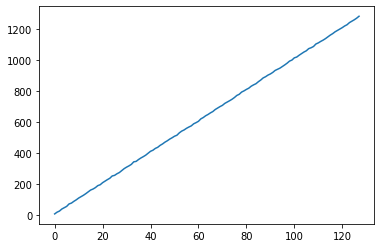

In [31]:
plt.plot(data1)


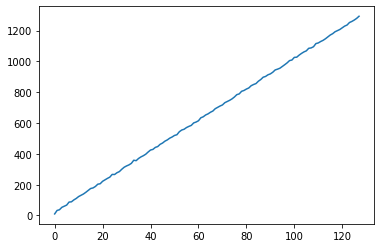

In [32]:
plt.plot(kalman_y)

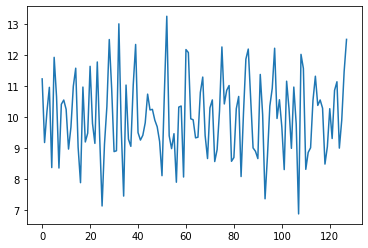

In [33]:
plt.plot(v_mess)

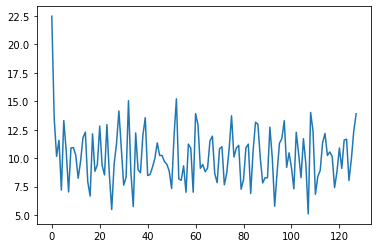

In [34]:
plt.plot(v_filtr)